# Hello! This python notebook runs through some exploratory analysis for my Naked Mole Rat research 

Below is a script that will create graphs from the two calculated files I created from my previous script.

The analysis looks at and plots relationships of three particular NMR's (Queen1, Queen2, and Breeding Male) within the colony. It does this in two ways: 

&nbsp;&nbsp;&nbsp;&nbsp;1) I look at how frequently these specific rats are with the majority of the colony<br>
&nbsp;&nbsp;&nbsp;&nbsp;2) I look at how frequently these specific rats are with each other

I calculate and plot both 1) and 2) above in two different ways: 

&nbsp;&nbsp;&nbsp;&nbsp;1) With the raw distribution of data over time<br>
&nbsp;&nbsp;&nbsp;&nbsp;2) With a normalized percentage of data over time 

I do this over a specific window (between hours 700-800) because this is the supposed weekend of birth

# The plots I have shown below ARE for the specific windows 700 - 800, however, at the current moment I am unable to distinguish much from them, therefore I came up with some initial observations from looking at the summary stats for the entire time frame. They are as follows:

## Initial observations: 
### These observations came from the summary statistics of the  Percentage plots with these specific animals and the mode, and the summary statistics of the percentage plots with these specific animals and each other. They are regarding the entire length of time (windows 1-800): 

* It definitely seems like the queens were together more often than with the breeding male
* The breeding male is ALMOST NEVER (according to the median of the PercentageofTimeQ2andBreedMaleareTogether graph)  together with Queen2
* It looks like Queen1 spends the most time with the rest of the animals compared to Queen2 and the Breeding male. 

## 2 things to Note about above observations: 

* The drop in the Breeding Male median percentage  <br/> 
* The consistency between the Queen 2 mean and median - should investigate distributions further

## Questions: 

1) What does more mean in the above statement? 
2) Do we look at the median or the mean for the summary statistics? I think we have to look at the distributions of all three graphs before we can determine if we can compare them at all. 

In [3]:
# Adding Necessary includes for data analysis 

In [4]:
from scipy.stats.mstats import mode
import pandas as pd
import numpy as np

# load libraries and set styles, options for plotting and other data analysis needs 

import warnings; warnings.simplefilter('ignore')
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

# from pandas import set_option
# set_option("display.max_rows", 16)

# LARGE_FIGSIZE = (12, 8)

from ipywidgets import interact
from ipywidgets import widgets

%matplotlib inline

# ^^^^^ https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/ 

In [5]:
# Change the directory to the one where your files are located 

%cd /home/zackymo/Desktop/ZachNewCalcsTextFiles

/home/zackymo/Desktop/ZachNewCalcsTextFiles


In [ ]:
# Read in the necessary data that was created from the main script

In [9]:
# Read in data

modeAnaDF = pd.read_table('QueensAndBreedSumsAtModeSens.txt', sep = ',')

# Rename columns 

modeAnaDF.columns = ['Queen1isWithMode','Queen2isWithMode','BreedMaleisWithMode', 'Tot']

# Dislay the dataset

modeAnaDF.head()

,Queen1isWithMode,Queen2isWithMode,BreedMaleisWithMode,Tot
0,1423,217,0,2587
1,22,0,0,1049
2,0,196,0,822
3,0,0,0,612
4,0,940,0,1298


# Graphing the raw counts that each specific animal spent with the majority of other animals from Window 700 - 800 

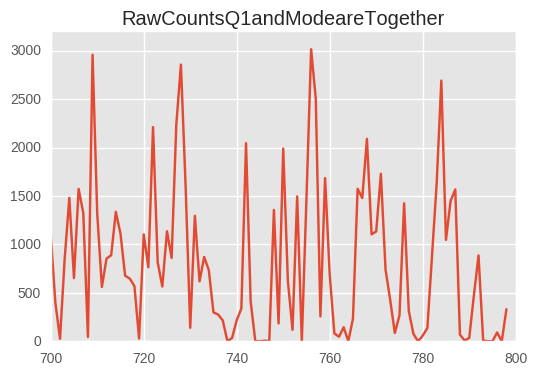

In [47]:
# Plot raw counts over time of how often Queen1 was with the Mode

aa = modeAnaDF['Queen1isWithMode'].plot(xlim = (700,800), ylim = (0,3200), title = 'RawCountsQ1andModeareTogether')
fig = aa.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ1andModeareTogether.png')

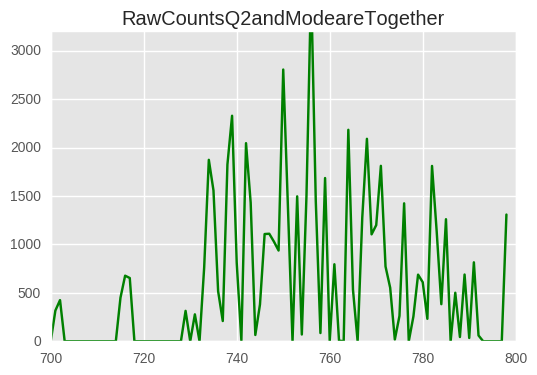

In [50]:
ab = modeAnaDF['Queen2isWithMode'].plot(xlim = (700,800), ylim = (0,3200), title = 'RawCountsQ2andModeareTogether', color = 'g')
fig = ab.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ2andModeareTogether.png')

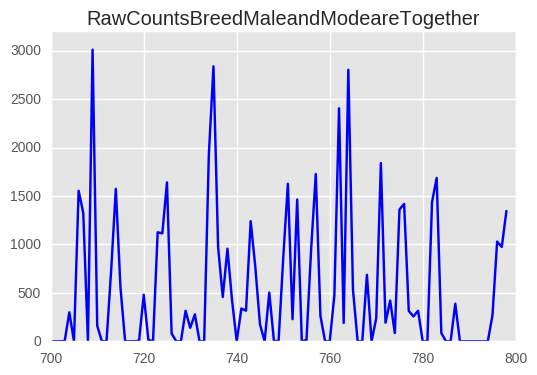

In [51]:
ac = modeAnaDF['BreedMaleisWithMode'].plot(xlim = (700,800), ylim = (0,3200), title = 'RawCountsBreedMaleandModeareTogether', color = 'b')
fig = ac.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsBreedMaleandModeareTogether.png')

In [21]:
# Graphing the percentages of time each specific animal spent with the majority of other animals 

In [26]:
modeAnaDF['PercentageofTimeQ1andModeareTogether'] = (modeAnaDF['Queen1isWithMode']/modeAnaDF['Tot'])*100

modeAnaDF['PercentageofTimeQ2andModeareTogether'] = (modeAnaDF['Queen2isWithMode']/modeAnaDF['Tot'])*100

modeAnaDF['PercentageofTimeBreedMaleandModeareTogether'] = (modeAnaDF['BreedMaleisWithMode']/modeAnaDF['Tot'])*100

modeAnaDF.head()

,Queen1isWithMode,Queen2isWithMode,BreedMaleisWithMode,Tot,PercentageofTimeQ1andModeareTogether,PercentageofTimeQueen2andModeareTogether,PercentageofTimeBreedMaleandModeareTogether,PercentageofTimeQ2andModeareTogether
0,1423,217,0,2587,55.005798,8.388094,0.0,8.388094
1,22,0,0,1049,2.097235,0.000000,0.0,0.000000
2,0,196,0,822,0.000000,23.844282,0.0,23.844282
3,0,0,0,612,0.000000,0.000000,0.0,0.000000
4,0,940,0,1298,0.000000,72.419106,0.0,72.419106


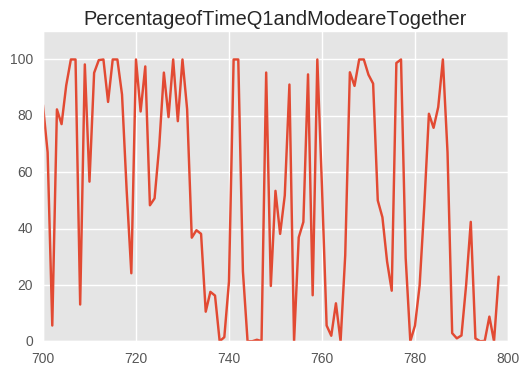

In [43]:
ax = modeAnaDF['PercentageofTimeQ1andModeareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ1andModeareTogether')
fig = ax.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQ1andModeareTogether.png')

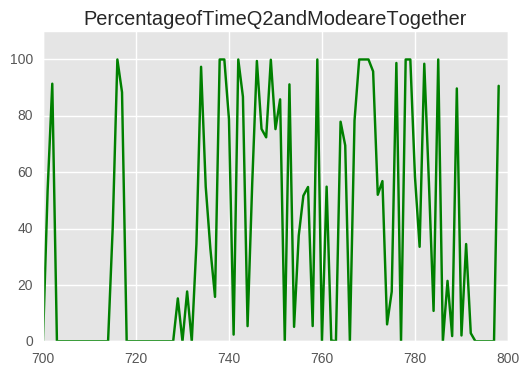

In [44]:
ay = modeAnaDF['PercentageofTimeQ2andModeareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ2andModeareTogether', color = 'g')
fig = ay.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQueen2andModeareTogether.png')


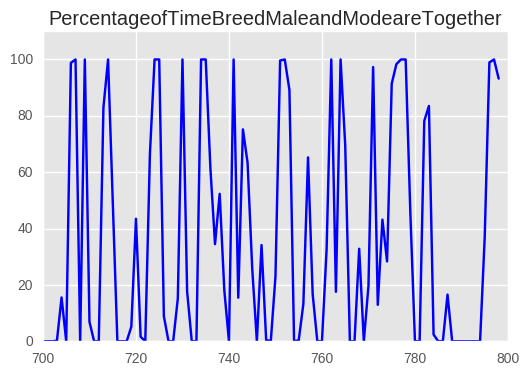

In [45]:
az = modeAnaDF['PercentageofTimeBreedMaleandModeareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeBreedMaleandModeareTogether', color = 'b')
fig = az.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeBreedMaleandModeareTogether.png')

# Summary Statistics on all windows of specific animals with the Mode 

## Initial findings: it looks like Queen1 spends the most time with the rest of the animals compared to Queen2 and the Breeding male. 

## 2 things to Note: 

1) The drop in the Breeding Male median percentage  <br/> 
2) The consistency between the Queen 2 mean and median - should investigate distributions further  

In [30]:
modeAnaDF['PercentageofTimeQ1andModeareTogether'].describe()

count    799.000000
mean      55.643553
std       39.026956
min        0.000000
25%       15.588841
50%       58.867491
75%       97.493701
max      100.000000
Name: PercentageofTimeQ1andModeareTogether, dtype: float64

In [31]:
modeAnaDF['PercentageofTimeQ1andModeareTogether'].median()

58.86749065823512

In [32]:
modeAnaDF['PercentageofTimeQ2andModeareTogether'].describe()

count    799.000000
mean      43.827605
std       42.114955
min        0.000000
25%        0.000000
50%       34.394904
75%       95.167357
max      100.000000
Name: PercentageofTimeQ2andModeareTogether, dtype: float64

In [34]:
modeAnaDF['PercentageofTimeQ2andModeareTogether'].median()

34.394904458598724

In [36]:
modeAnaDF['PercentageofTimeBreedMaleandModeareTogether'].describe()

count    799.000000
mean      37.723857
std       41.622849
min        0.000000
25%        0.000000
50%       16.709022
75%       86.161961
max      100.000000
Name: PercentageofTimeBreedMaleandModeareTogether, dtype: float64

In [46]:
modeAnaDF['PercentageofTimeBreedMaleandModeareTogether'].median()

16.70902160101652

# Graphing the raw counts over time a specific animal spent with one another 

In [53]:
modeAnaDF1 = pd.read_table('QueensAndBreedSumsWithOneAnother.txt', sep = ',')

modeAnaDF1.columns = ['Queen1isWithQueen2','Queen1isWithBreedMale','Queen2isWithBreedMale', 'Tot']

modeAnaDF1['PercentageofTimeQ1andQ2areTogether'] = (modeAnaDF1['Queen1isWithQueen2']/modeAnaDF1['Tot'])*100

modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'] = (modeAnaDF1['Queen1isWithBreedMale']/modeAnaDF1['Tot'])*100

modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'] = (modeAnaDF1['Queen2isWithBreedMale']/modeAnaDF1['Tot'])*100

modeAnaDF1.head()

,Queen1isWithQueen2,Queen1isWithBreedMale,Queen2isWithBreedMale,Tot,PercentageofTimeQ1andQ2areTogether,PercentageofTimeQ1andBreedMaleareTogether,PercentageofTimeQ2andBreedMaleareTogether
0,218,1034,0,2587,8.426749,39.969076,0.0
1,26,456,0,1049,2.478551,43.469971,0.0
2,1,0,0,822,0.121655,0.000000,0.0
3,0,351,0,612,0.000000,57.352941,0.0
4,0,1079,0,1298,0.000000,83.127889,0.0


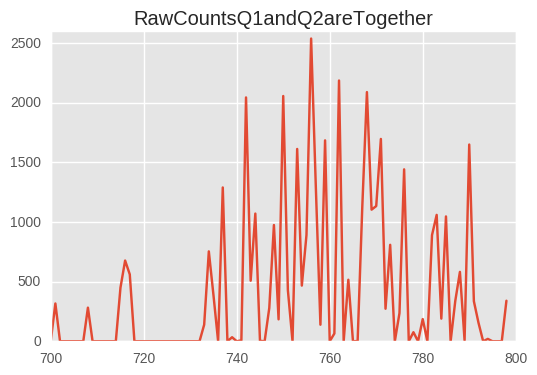

In [57]:
ad = modeAnaDF1['Queen1isWithQueen2'].plot(xlim = (700,800), ylim = (0,2600), title = 'RawCountsQ1andQ2areTogether')
fig = ad.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ1andQ2areTogether.png')

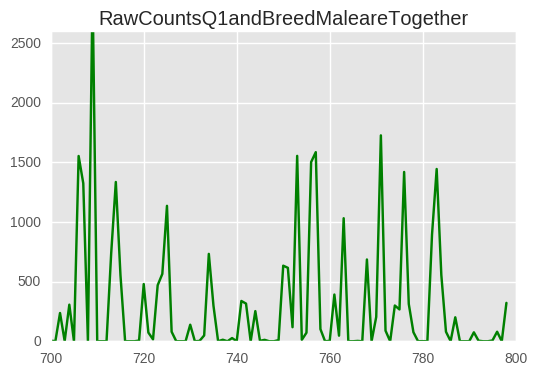

In [61]:
ae = modeAnaDF1['Queen1isWithBreedMale'].plot(xlim = (700,800), ylim = (0,2600), title = 'RawCountsQ1andBreedMaleareTogether', color = 'g')
fig = ae.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ1andBreedMaleareTogether.png')

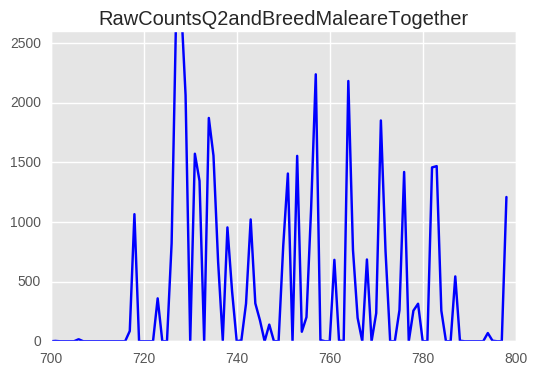

In [63]:
af = modeAnaDF1['Queen2isWithBreedMale'].plot(xlim = (700,800), ylim = (0,2600), title = 'RawCountsQ2andBreedMaleareTogether', color = 'b')
fig = af.get_figure()
fig.savefig('/home/zackymo/Desktop/RawCountsQ2andBreedmaleareTogether.png')

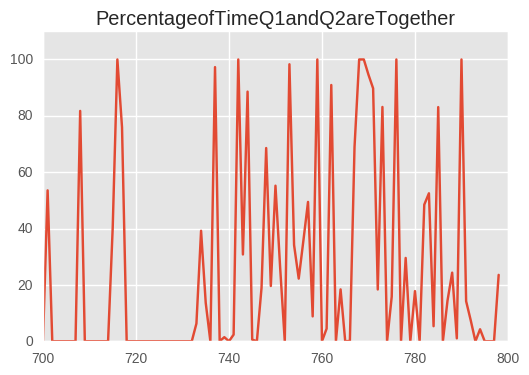

In [65]:
ag = modeAnaDF1['PercentageofTimeQ1andQ2areTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ1andQ2areTogether')
fig = ag.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQ1andQ2areTogether.png')


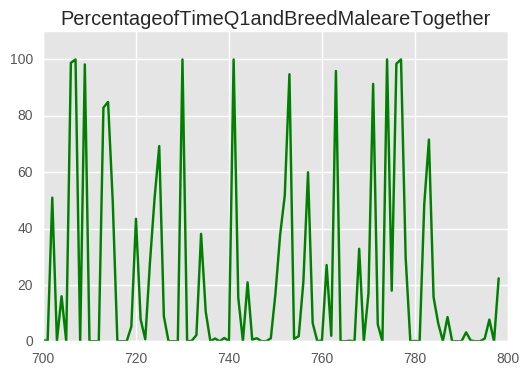

In [68]:
ah = modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ1andBreedMaleareTogether', color ='g')
fig = ah.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQ1andBreedMaleareTogether.png')


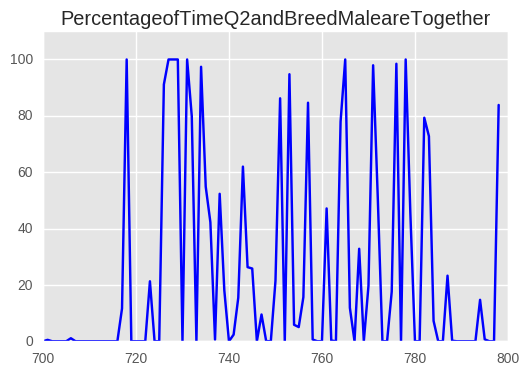

In [70]:
ai = modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'].plot(xlim = (700,800), ylim = (0,110), title = 'PercentageofTimeQ2andBreedMaleareTogether', color ='b')
fig = ai.get_figure()
fig.savefig('/home/zackymo/Desktop/PercentageofTimeQ2andBreedMaleareTogether.png')


# Summary statistics of percentages over ALL 800 windows should maybe create a function to evaluate these or show these for the multiple weekends 

## Initial findings:

1) It definitely seems like the queens were together more often than with the breeding male
2) The breeding male is ALMOST NEVER (according to the median) together with the second Queen

## Questions: 

1) What does more mean in the above statement? 
2) Do we look at the median or the mean for the summary statistics? I think we have to look at the distributions of all three graphs before we can determine if we can compare them at all. 

In [72]:
# Summary statistics of percentages over ALL 800 windows should maybe create a function to evaluate these or show these 
# for the multile weekends 

modeAnaDF1['PercentageofTimeQ1andQ2areTogether'].describe()


count    799.000000
mean      32.692028
std       38.149756
min        0.000000
25%        0.000000
50%       12.838360
75%       68.532329
max      100.000000
Name: PercentageofTimeQ1andQ2areTogether, dtype: float64

In [74]:
# Additional summary statistic 

modeAnaDF1['PercentageofTimeQ1andQ2areTogether'].median()

12.838360402165508

In [75]:
# Summary statistics of percentages

modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'].describe()


count    799.000000
mean      26.969200
std       36.147022
min        0.000000
25%        0.000000
50%        5.747520
75%       47.690258
max      100.000000
Name: PercentageofTimeQ1andBreedMaleareTogether, dtype: float64

In [76]:
modeAnaDF1['PercentageofTimeQ1andBreedMaleareTogether'].median()

5.747519671570305

In [77]:
modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'].describe()

count    799.000000
mean      24.246253
std       36.516004
min        0.000000
25%        0.000000
50%        0.702050
75%       42.138705
max      100.000000
Name: PercentageofTimeQ2andBreedMaleareTogether, dtype: float64

In [78]:
modeAnaDF1['PercentageofTimeQ2andBreedMaleareTogether'].median()

0.7020499859590003